### Importing the Libraries

In [40]:
import matplotlib.pyplot as plt
import os, cv2, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

### Reading the Training Dataset

In [41]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [42]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [43]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [44]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

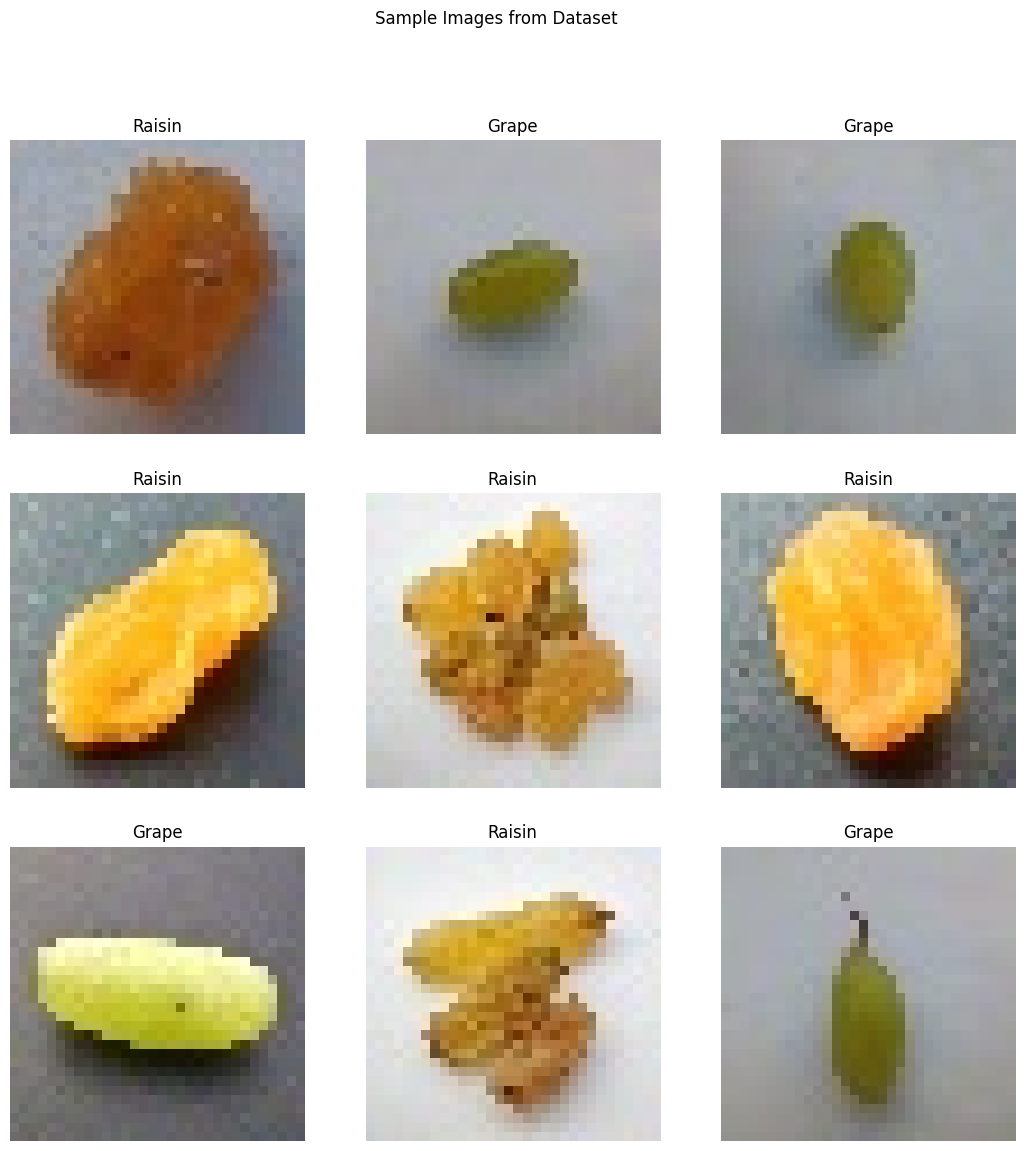

In [45]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [46]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building a Model like the VGG16

In [47]:
vgg16_model = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

### Defining EarlyStop

In [48]:
early_stop = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 5,
    verbose = 0,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
    start_from_epoch = 0,
)

### Defining ModelCheckpoint

In [49]:
filepath = "F:/Python Codes/Artificial Intelligence Lab/Assignment 5/Model Checkpoint"
model_checkpoint = ModelCheckpoint(
    filepath,
    monitor = "val_loss",
    verbose = 0,
    save_best_only = False,
    save_weights_only = False,
    mode = "auto",
    save_freq = "epoch",
    initial_value_threshold = None,
)

### Defining Scheduler

In [50]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

### Model History

In [51]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val), callbacks = [early_stop, model_checkpoint, lr_scheduler])

Epoch 1/50


34/34 [==============================] - ETA: 0s - loss: 3.1182 - accuracy: 0.6888INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 14s 353ms/step - loss: 3.1182 - accuracy: 0.6888 - val_loss: 0.4299 - val_accuracy: 0.9038 - lr: 1.0000e-04
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 0.7698 - accuracy: 0.8907INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 12s 348ms/step - loss: 0.7698 - accuracy: 0.8907 - val_loss: 0.5547 - val_accuracy: 0.9000 - lr: 1.0000e-04
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.9393INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 11s 320ms/step - loss: 0.3544 - accuracy: 0.9393 - val_loss: 0.3513 - val_accuracy: 0.9385 - lr: 1.0000e-04
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.9561INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 294ms/step - loss: 0.2578 - accuracy: 0.9561 - val_loss: 0.3045 - val_accuracy: 0.9385 - lr: 1.0000e-04
Epoch 5/50
34/34 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9701INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 302ms/step - loss: 0.1492 - accuracy: 0.9701 - val_loss: 0.1868 - val_accuracy: 0.9500 - lr: 1.0000e-04
Epoch 6/50
34/34 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9757INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 306ms/step - loss: 0.1175 - accuracy: 0.9757 - val_loss: 0.2409 - val_accuracy: 0.9462 - lr: 1.0000e-04
Epoch 7/50
34/34 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9664INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 298ms/step - loss: 0.1434 - accuracy: 0.9664 - val_loss: 0.1871 - val_accuracy: 0.9500 - lr: 1.0000e-04
Epoch 8/50
34/34 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9869INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 11s 337ms/step - loss: 0.0482 - accuracy: 0.9869 - val_loss: 0.1121 - val_accuracy: 0.9731 - lr: 1.0000e-04
Epoch 9/50
34/34 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9738INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 11s 342ms/step - loss: 0.0973 - accuracy: 0.9738 - val_loss: 0.1005 - val_accuracy: 0.9692 - lr: 1.0000e-04
Epoch 10/50
34/34 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9850INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 303ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0884 - val_accuracy: 0.9808 - lr: 1.0000e-04
Epoch 11/50
34/34 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9888INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 10s 304ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.1495 - val_accuracy: 0.9692 - lr: 9.0484e-05
Epoch 12/50
34/34 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9832INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 11s 321ms/step - loss: 0.0511 - accuracy: 0.9832 - val_loss: 0.0979 - val_accuracy: 0.9769 - lr: 8.1873e-05
Epoch 13/50
34/34 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9869INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 14s 413ms/step - loss: 0.0344 - accuracy: 0.9869 - val_loss: 0.1192 - val_accuracy: 0.9731 - lr: 7.4082e-05
Epoch 14/50
34/34 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9879INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 12s 365ms/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.1085 - val_accuracy: 0.9769 - lr: 6.7032e-05
Epoch 15/50
34/34 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9916INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


INFO:tensorflow:Assets written to: F:/Python Codes/Artificial Intelligence Lab/Assignment 5\Model Checkpoint\assets


34/34 [==============================] - 12s 349ms/step - loss: 0.0173 - accuracy: 0.9916 - val_loss: 0.0979 - val_accuracy: 0.9808 - lr: 6.0653e-05


### Plotting The Accuracy & Loss Graph

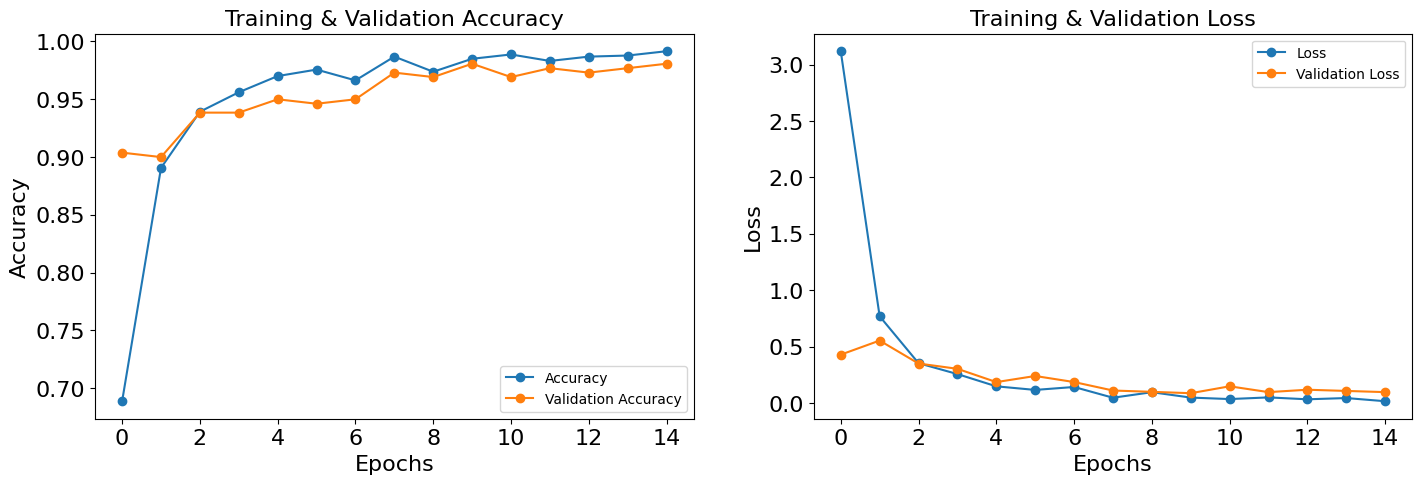

In [54]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy", marker = "o")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy", marker = "o")
plt.title("Training & Validation Accuracy", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss", marker = "o")
plt.plot(history.history["val_loss"], label = "Validation Loss", marker = "o")
plt.title("Training & Validation Loss", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [53]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

14/14 [==============================] - 3s 237ms/step - loss: 1.8201 - accuracy: 0.7524
Test Accuracy: 75.24%
